# Inheritance

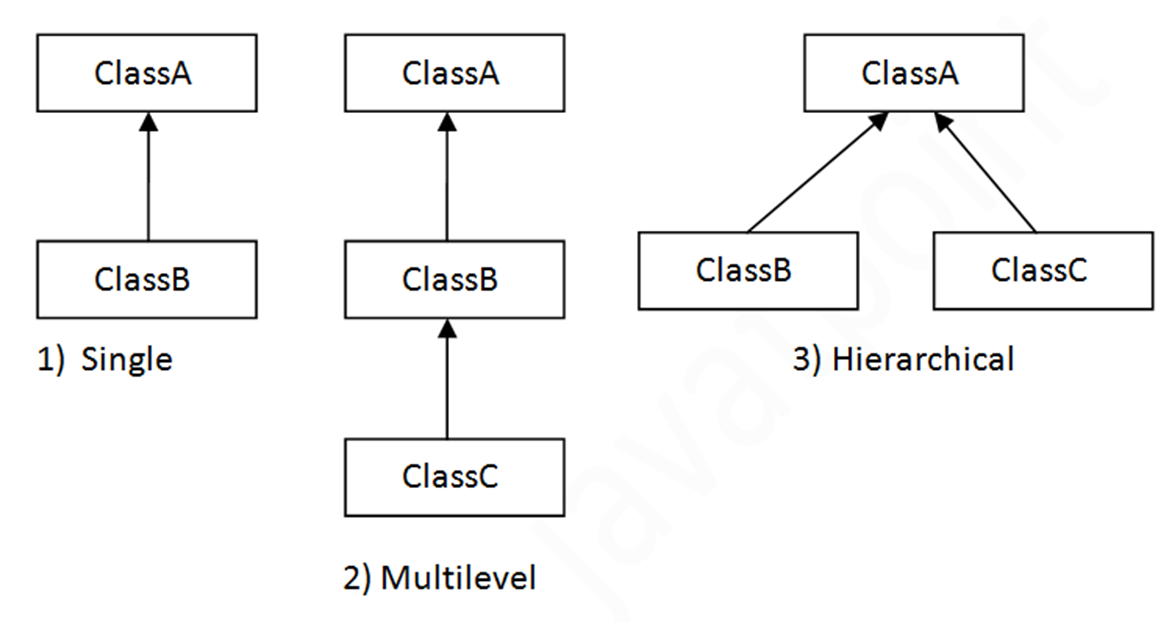

In [12]:
class Person:

    def __init__(self, name: str, age: int):
        self.name = name
        self.age = age

    def introduce(self):
        print(f"My name is {self.name}")
        print(f"I am {self.age} years old")

In [13]:
class Employee(Person):

    def __init__(self, name: str, age: int, company: str):
        super().__init__(name, age)
        self.company = company

    def work(self):
        print(f"I work for {self.company}")

In [14]:
p1 = Person(name="Rahul", age=28)
type(p1)

__main__.Person

In [15]:
p1.name

'Rahul'

In [16]:
p1.age

28

In [17]:
p1.introduce()

My name is Rahul
I am 28 years old


In [18]:
e1 = Employee(name= "Sarthak", age=35, company="TCS")
type(e1)

__main__.Employee

In [19]:
e1.name

'Sarthak'

In [20]:
e1.age

35

In [21]:
e1.company

'TCS'

In [22]:
e1.work()

I work for TCS


In [23]:
e1.introduce()

My name is Sarthak
I am 35 years old


In [24]:
e1.introduce()
e1.work()

My name is Sarthak
I am 35 years old
I work for TCS


### Practical example of single inhertance
Pydantic - Is data validation library in python

In [25]:
%pip install pydantic email-validator

  Using cached email_validator-2.2.0-py3-none-any.whl.metadata (25 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached dnspython-2.7.0-py3-none-any.whl.metadata (5.8 kB)
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ------------------------

1. gt - greater than
2. ge - greater than or equal to
3. lt - less than
4. le - less than or equal to

In [27]:
from pydantic import BaseModel, Field, EmailStr
from typing import Literal

In [28]:
class Student(BaseModel):
    roll_no: int = Field(description="Student Roll Number", gt=0)
    name: str = Field(description="Student name", min_length=1, max_length=50)
    marks: float = Field(description="Marks in percentage", gt=0, le=100)
    gender: Literal["male", "female"] = Field(description="Gender of student")
    email: EmailStr = Field(description= "Email of student")
    hobbies: list[str] = Field(description="Hobbies of student", default_factory=list)

    def get_student_details(self):
        print(f"Roll No : {self.roll_no}")
        print(f"Name : {self.name}")
        print(f"Marks : {self.marks}")
        print(f"Gender : {self.gender}")
        print(f"Email : {self.email}")
        print(f"Hobbies : {self.hobbies}")

In [31]:
s1 = Student(
    roll_no= 101,
    name = "Rohan",
    marks = 78.3,
    gender= "male",
    email= "rohan@test.com",
    hobbies= ["Cricket", "Singing"]
)

In [32]:
s1

Student(roll_no=101, name='Rohan', marks=78.3, gender='male', email='rohan@test.com', hobbies=['Cricket', 'Singing'])

In [33]:
type(s1)

__main__.Student

In [34]:
s1.roll_no

101

In [35]:
s1.name

'Rohan'

In [36]:
s1.email

'rohan@test.com'

In [37]:
s1.gender

'male'

In [38]:
s1.hobbies

['Cricket', 'Singing']

In [39]:
s1.get_student_details()

Roll No : 101
Name : Rohan
Marks : 78.3
Gender : male
Email : rohan@test.com
Hobbies : ['Cricket', 'Singing']


In [40]:
s2 = Student(
    roll_no= -103,
    name = "John",
    marks = 94.5,
    email = "random",
    gender= "male",
    hobbies= ["Dancing"]
)

ValidationError: 2 validation errors for Student
roll_no
  Input should be greater than 0 [type=greater_than, input_value=-103, input_type=int]
    For further information visit https://errors.pydantic.dev/2.10/v/greater_than
email
  value is not a valid email address: An email address must have an @-sign. [type=value_error, input_value='random', input_type=str]

In [41]:
s2

NameError: name 's2' is not defined

In [43]:
s2 = Student(
    roll_no= "a",
    name = 1234,
    marks = 150,
    gender = 23,
    email = 34.5,
    hobbies= {"a":2, "b":2}
)

ValidationError: 6 validation errors for Student
roll_no
  Input should be a valid integer, unable to parse string as an integer [type=int_parsing, input_value='a', input_type=str]
    For further information visit https://errors.pydantic.dev/2.10/v/int_parsing
name
  Input should be a valid string [type=string_type, input_value=1234, input_type=int]
    For further information visit https://errors.pydantic.dev/2.10/v/string_type
marks
  Input should be less than or equal to 100 [type=less_than_equal, input_value=150, input_type=int]
    For further information visit https://errors.pydantic.dev/2.10/v/less_than_equal
gender
  Input should be 'male' or 'female' [type=literal_error, input_value=23, input_type=int]
    For further information visit https://errors.pydantic.dev/2.10/v/literal_error
email
  Input should be a valid string [type=string_type, input_value=34.5, input_type=float]
    For further information visit https://errors.pydantic.dev/2.10/v/string_type
hobbies
  Input should be a valid list [type=list_type, input_value={'a': 2, 'b': 2}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.10/v/list_type

### Next part starting at 7:10 pm

### Multiple inheritance
1 child class inheriting from multiple parent class

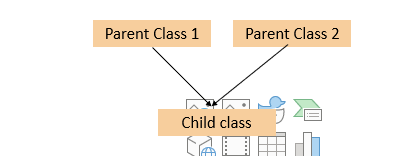

In [44]:
class BaseSalary:

    def __init__(self, base_salary: float):
        self.base_salary = base_salary

    def get_base_salary(self):
        return self.base_salary

In [45]:
class Bonus:

    def __init__(self, bonus_percentage: float):
        self.bonus_percentage = bonus_percentage

    def calculate_bonus(self, salary):
        return (self.bonus_percentage/100) * salary

In [51]:
class TotalSalary(BaseSalary, Bonus):

    def __init__(self, name: str, base_salary: float, bonus_percentage: float):
        BaseSalary.__init__(self, base_salary)
        Bonus.__init__(self, bonus_percentage)
        self.name = name

    def get_total_salary(self):
        bonus = self.calculate_bonus(self.base_salary)
        return self.base_salary + bonus

In [52]:
t1 = TotalSalary(name="Rohan", base_salary=5_00_000.0, bonus_percentage= 12.5)

In [53]:
t1.name

'Rohan'

In [54]:
t1.base_salary

500000.0

In [55]:
t1.bonus_percentage

12.5

In [56]:
t1.get_base_salary()

500000.0

In [58]:
t1.calculate_bonus(t1.base_salary)

62500.0

In [59]:
t1.get_total_salary()

562500.0

### Multilevel Inheritence

In [60]:
class Employee2:

    def __init__(self, emp_id, name):
        self.emp_id = emp_id
        self.name = name

    def get_employee_info(self):
        print(f"Employee Id : {self.emp_id}, Name : {self.name}")

In [61]:
class Manager(Employee2):

    def __init__(self, emp_id, name, dept):
        super().__init__(emp_id, name)
        self.dept = dept

    def get_department(self):
        print(f"Department : {self.dept}")
        

In [62]:
class ProjectManager(Manager):

    def __init__(self, emp_id, name, dept, project):
        super().__init__(emp_id, name, dept)
        self.project = project

    def get_project(self):
        print(f"Project Name : {self.project}")

In [63]:
e1 = Employee2(emp_id= 105, name="Sarthak")
type(e1)

__main__.Employee2

In [64]:
e1.emp_id

105

In [65]:
e1.name

'Sarthak'

In [66]:
e1.get_employee_info()

Employee Id : 105, Name : Sarthak


In [67]:
m1 = Manager(emp_id= 103, name="Aditi", dept="Engg.")
type(m1)

__main__.Manager

In [68]:
m1.emp_id

103

In [69]:
m1.name

'Aditi'

In [70]:
m1.dept

'Engg.'

In [71]:
m1.get_department()

Department : Engg.


In [72]:
m1.get_employee_info()

Employee Id : 103, Name : Aditi


In [73]:
m1.get_employee_info()
m1.get_department()

Employee Id : 103, Name : Aditi
Department : Engg.


In [74]:
pm1 = ProjectManager(emp_id= 102, name="Raman", dept="Data Science", project="Delloite Finance")

In [75]:
type(pm1)

__main__.ProjectManager

In [76]:
pm1.emp_id

102

In [77]:
pm1.name

'Raman'

In [78]:
pm1.dept

'Data Science'

In [79]:
pm1.project

'Delloite Finance'

In [80]:
pm1.get_project()

Project Name : Delloite Finance


In [81]:
pm1.get_department()

Department : Data Science


In [82]:
pm1.get_employee_info()

Employee Id : 102, Name : Raman


In [83]:
pm1.get_employee_info()
pm1.get_department()
pm1.get_project()

Employee Id : 102, Name : Raman
Department : Data Science
Project Name : Delloite Finance


### Hierarchical inheritance

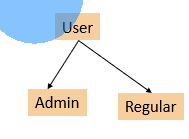

In [84]:
class User:

    def __init__(self, username, email):
        self.username = username
        self.email = email

    def get_user_details(self):
        print(f"Username : {self.username}, Email : {self.email}")

In [85]:
class AdminUser(User):

    def __init__(self, username, email, access):
        super().__init__(username, email)
        self.access = access

    def get_access_info(self):
        print(f"Access Level : {self.access}")

In [86]:
class RegularUser(User):

    def __init__(self, username, email, subscription):
        super().__init__(username, email)
        self.subscription =subscription

    def get_sub_details(self):
        print(f"Subscription interval : {self.subscription}")

In [87]:
u1 = User(username= "ramanr1", email="raman@test.com")
type(u1)

__main__.User

In [88]:
u1.username

'ramanr1'

In [89]:
u1.email

'raman@test.com'

In [90]:
u1.get_user_details()

Username : ramanr1, Email : raman@test.com


In [91]:
a1 = AdminUser(username="admin001", email="admin@test.com", access="partial")
type(a1)

__main__.AdminUser

In [92]:
a1.username

'admin001'

In [93]:
a1.email

'admin@test.com'

In [94]:
a1.access

'partial'

In [95]:
a1.get_access_info()

Access Level : partial


In [96]:
a1.get_user_details()

Username : admin001, Email : admin@test.com


In [97]:
a1.get_user_details()
a1.get_access_info()

Username : admin001, Email : admin@test.com
Access Level : partial


In [98]:
r1 = RegularUser(username= "aditim3", email="aditi@test.com", subscription="monthly")

In [99]:
r1.get_sub_details()

Subscription interval : monthly


In [100]:
r1.get_user_details()

Username : aditim3, Email : aditi@test.com


In [101]:
r1.get_user_details()
r1.get_sub_details()

Username : aditim3, Email : aditi@test.com
Subscription interval : monthly


In [102]:
r1.get_access_info()

AttributeError: 'RegularUser' object has no attribute 'get_access_info'

In [103]:
a1.get_sub_details()

AttributeError: 'AdminUser' object has no attribute 'get_sub_details'